## Using Recipes to get Documents

Documents are annoying to build from scratch. But we don't have to! Let's use a predefined recipe:

In [22]:
import json
processed_doc = doc.to_json(with_images=True)
json.dump(processed_doc, open(root_dir / 'Folding and Unfolding on Metagraphs, Ben Goertzel et al., 2020, v3.json', 'w'))

In [21]:
root_dir = pathlib.Path('/Users/rohanbisariya/GitHub/agent_automation/mimir/langchain-ask-pdf/')

<bound method Path.home of <class 'pathlib.Path'>>

In [26]:
import pathlib
from papermage.recipes import CoreRecipe
downloads_dir = pathlib.Path('/Users/rohanbisariya/Downloads/')
recipe = CoreRecipe()
# filepath = root_dir / "Folding and Unfolding on Metagraphs, Ben Goertzel et al., 2020, v3.pdf"
filepath = downloads_dir / 'Reasoning in Large Language Models_ A Geometric Perspective, Romain Cosentino et al., 2024, v1.pdf'
doc = recipe.run(filepath)

100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


let's visualize the first page of the PDF we just opened:

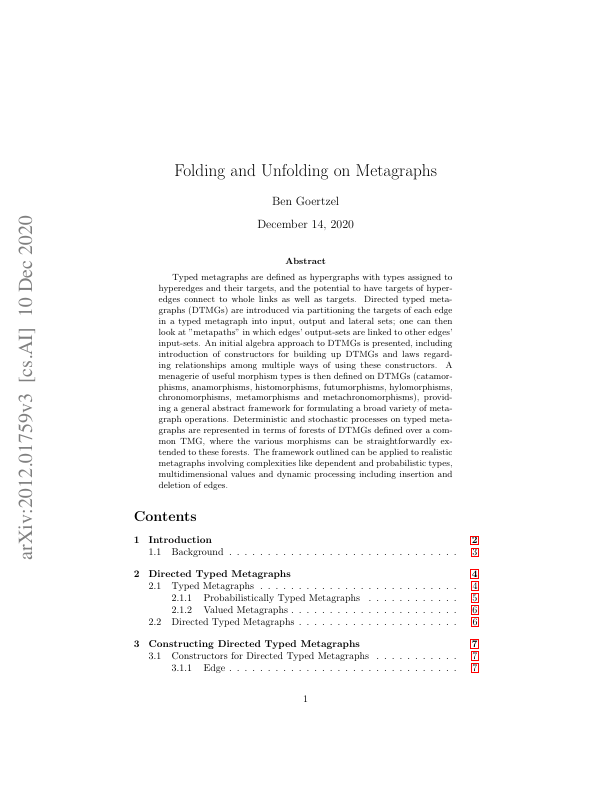

In [4]:
doc.pages[0].images[0]

It looks great! How about visualizing some of the layers in the document? 
For example, let's highlight all tokens in yellow, and put a red box around the abstract.

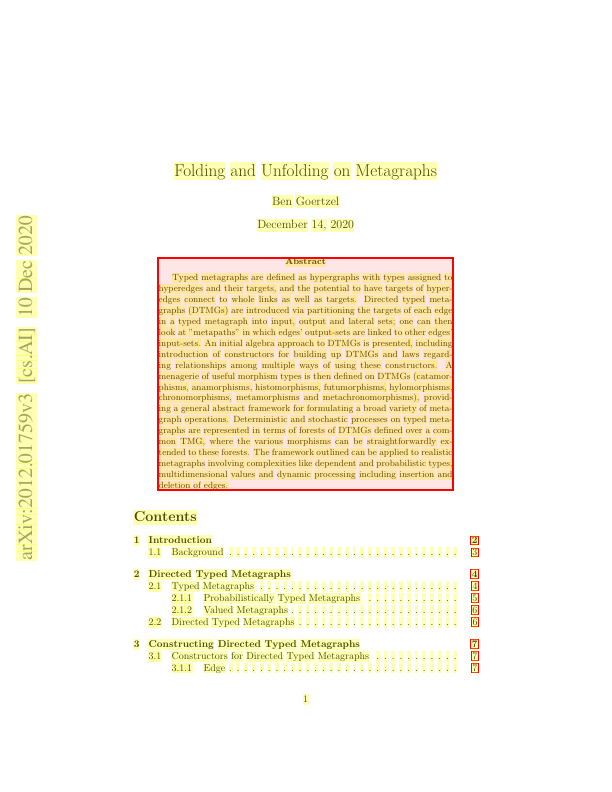

In [5]:
from papermage.visualizers import plot_entities_on_page

page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
highlighted = plot_entities_on_page(highlighted, page.abstracts, box_width=2, box_alpha=0.1, box_color="red")
display(highlighted)

Let's now look at how we can get sentences in the abstract, and then get the tokens in each sentence:

In [6]:
for sentence in doc.abstracts[0].sentences:
    words = []
    # skip the first two words, which header 
    for word in sentence.words:
        words.append(word.text)
    print(" ".join(words)[:80] + "...")

Folding and Unfolding on Metagraphs Ben Goertzel December 14 , 2020 Abstract Typ...
Directed typed meta-graphs ( DTMGs ) are introduced via partitioning the targets...
An initial algebra approach to DTMGs is presented , including introduction of co...
A menagerie of useful morphism types is then deﬁned on DTMGs ( catamor-phisms , ...
Deterministic and stochastic processes on typed meta-graphs are represented in t...
The framework outlined can be applied to realistic metagraphs involving complexi...


In [16]:
doc.equations

Layer with 16 Entities:
	Annotated Entity:	ID: 0	Spans: True	Boxes: True	Text: L = ( T, ( L 1 , T 1 ) , . . . , ( L n , T n ))
	Annotated Entity:	ID: 1	Spans: True	Boxes: True	Text: (cid:0) T i , ( L i 1 , T i 1 ) , . . . , ( L in , T in ) (cid:1)
	Annotated Entity:	ID: 2	Spans: True	Boxes: True	Text: min ( m,n ) (cid:88)
i =1
max ( m, n )!
( max ( m, n ) − min ( m, n ))!
	Annotated Entity:	ID: 3	Spans: True	Boxes: True	Text: P : s k [ m ] → s k [ n ]
	Annotated Entity:	ID: 4	Spans: True	Boxes: True	Text: ( G (cid:46)(cid:47) P H ) (cid:107) ( J (cid:46)(cid:47) Q K ) = ( G (cid:107) J ) (cid:46)(cid:47) P (cid:107) Q ( H (cid:107) K )
	Annotated Entity:	ID: 5	Spans: True	Boxes: True	Text: G (cid:46)(cid:47) ∅ H = G (cid:107) H
	Annotated Entity:	ID: 6	Spans: True	Boxes: True	Text: swap j,k (cid:46)(cid:47) I ( G (cid:107) H ) (cid:46)(cid:47) I swap p,q = H (cid:107) G
	Annotated Entity:	ID: 7	Spans: True	Boxes: True	Text: γ G, 0 = id G
γ G,H + J = ( γ G,H + id J ) ◦ ( id H + γ G,J )


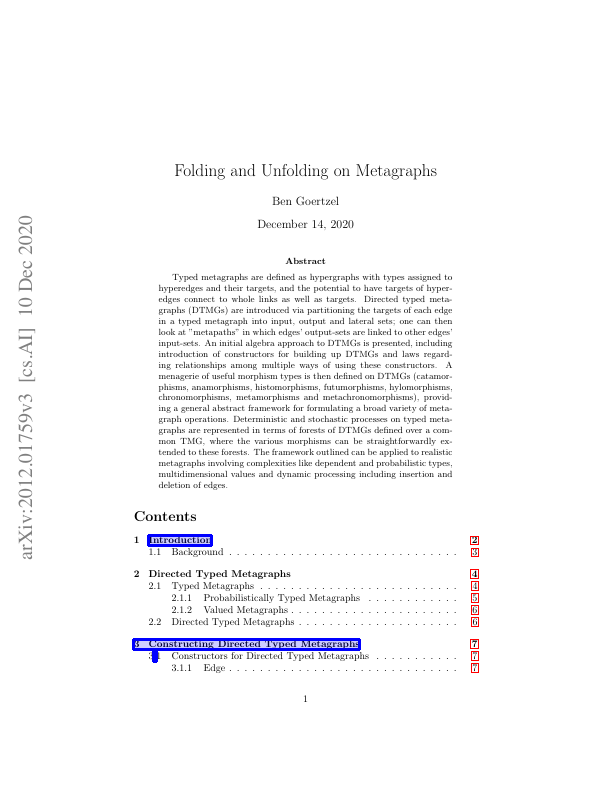

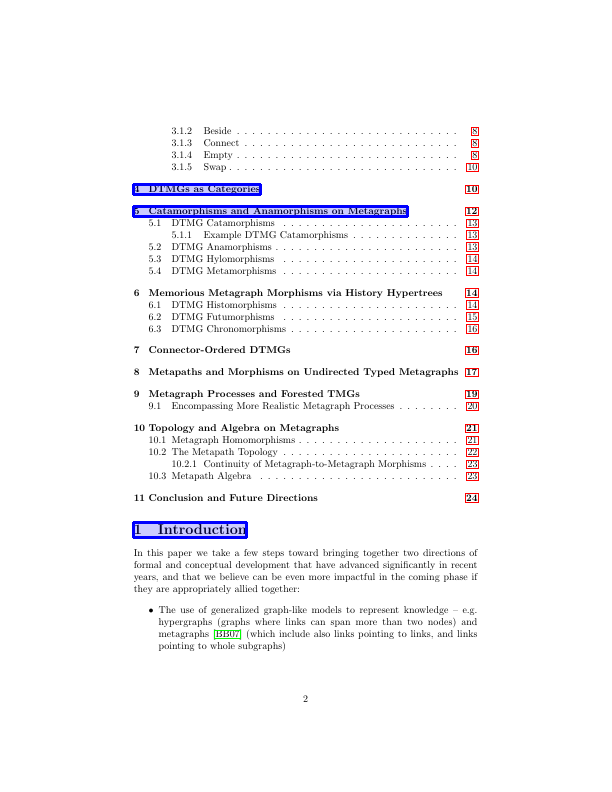

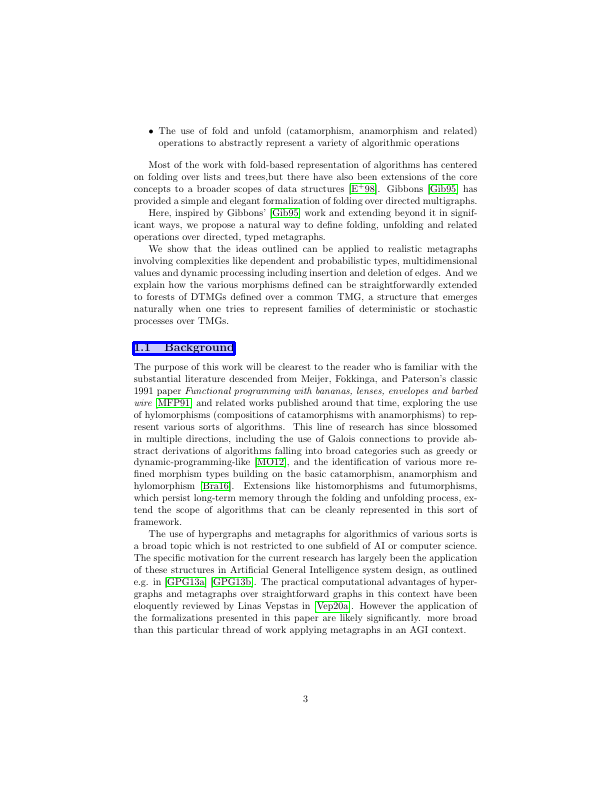

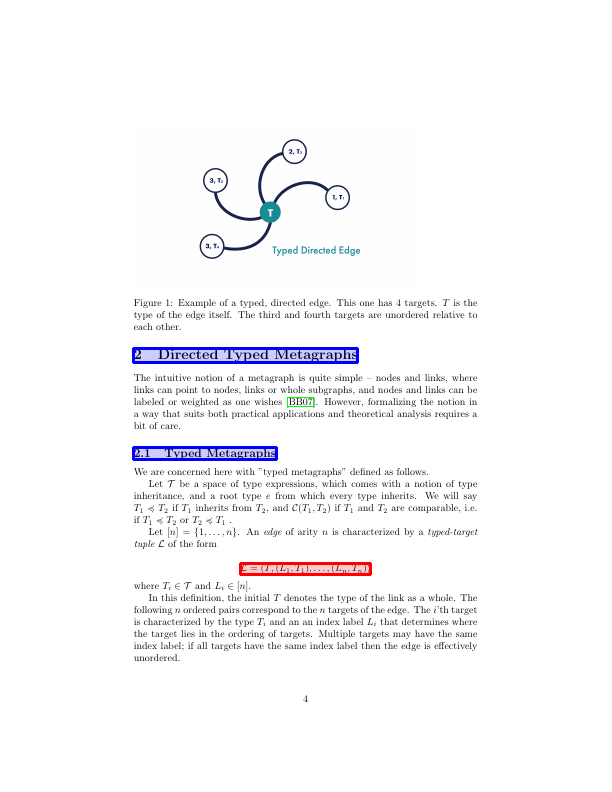

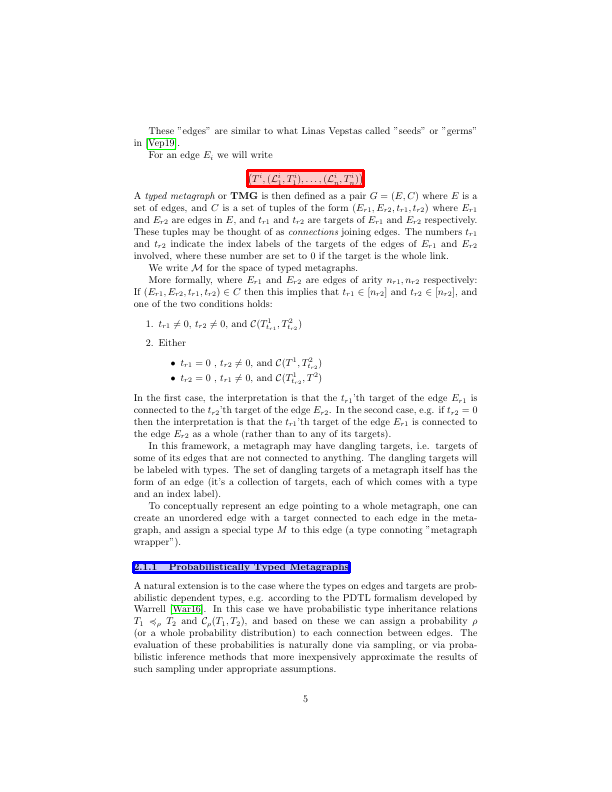

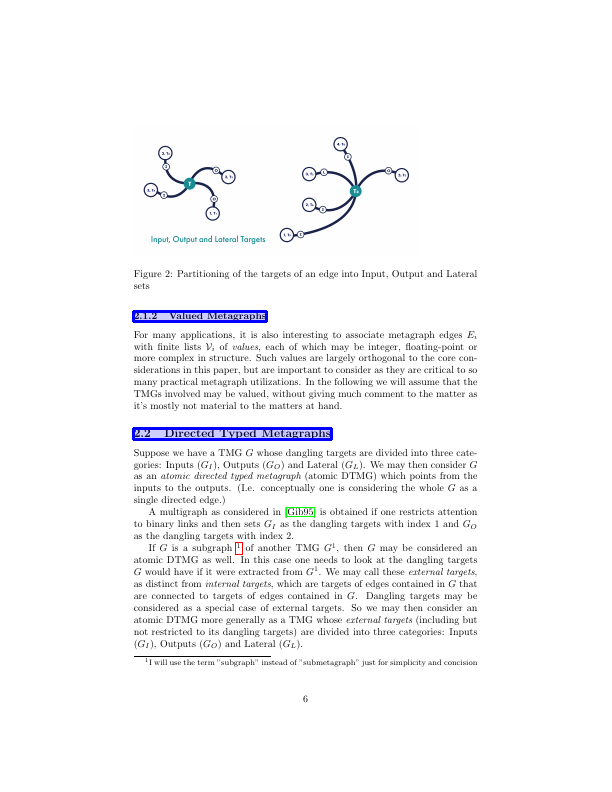

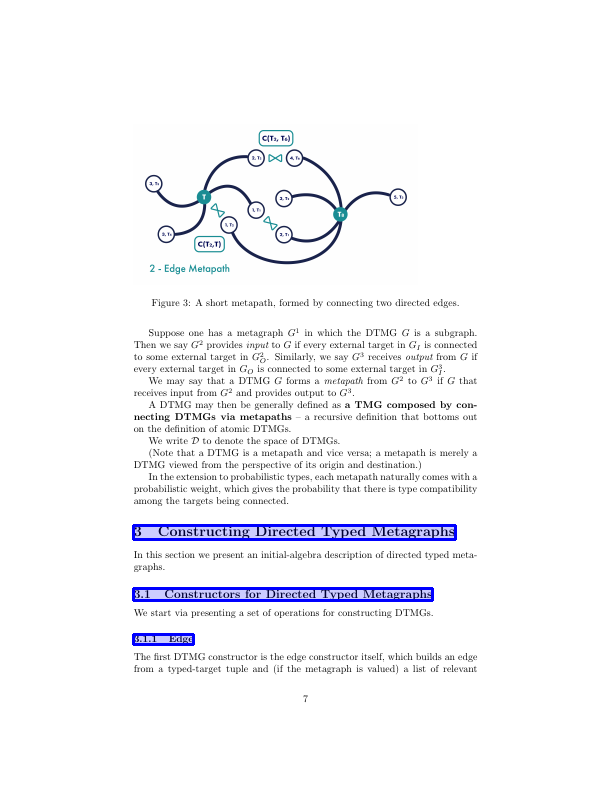

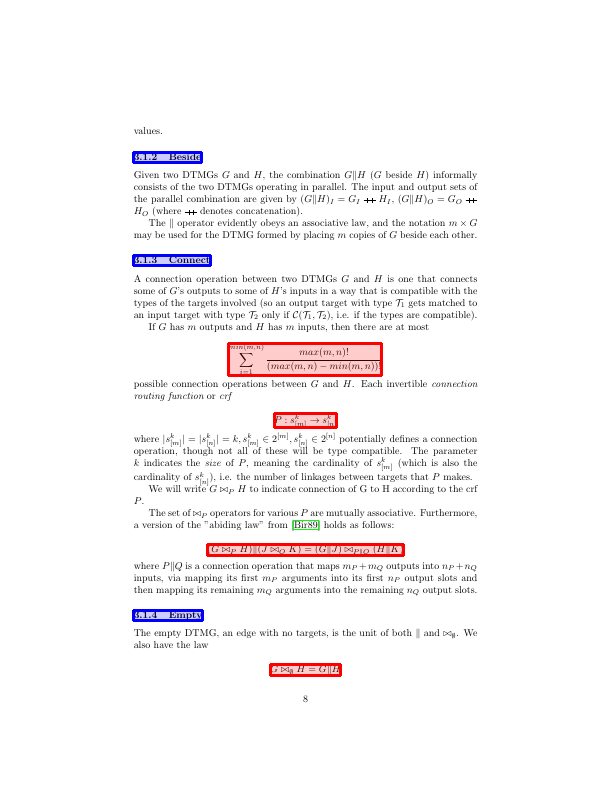

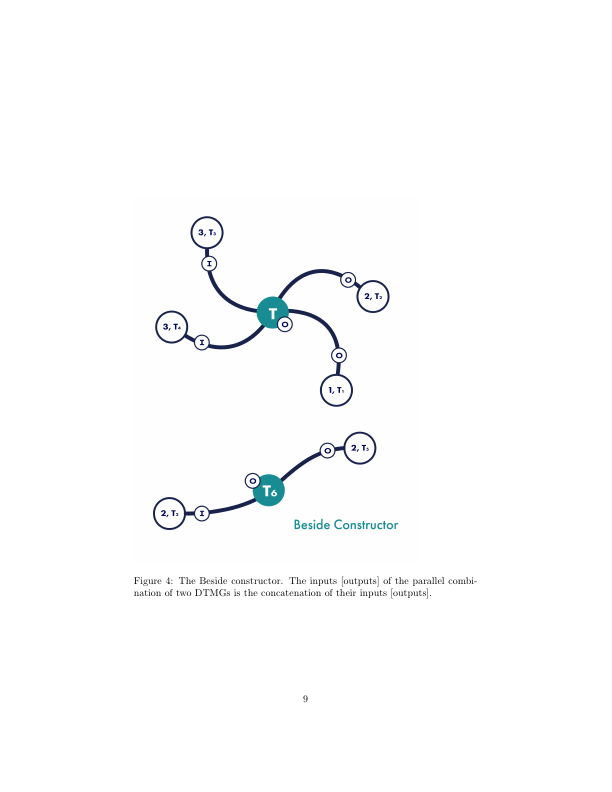

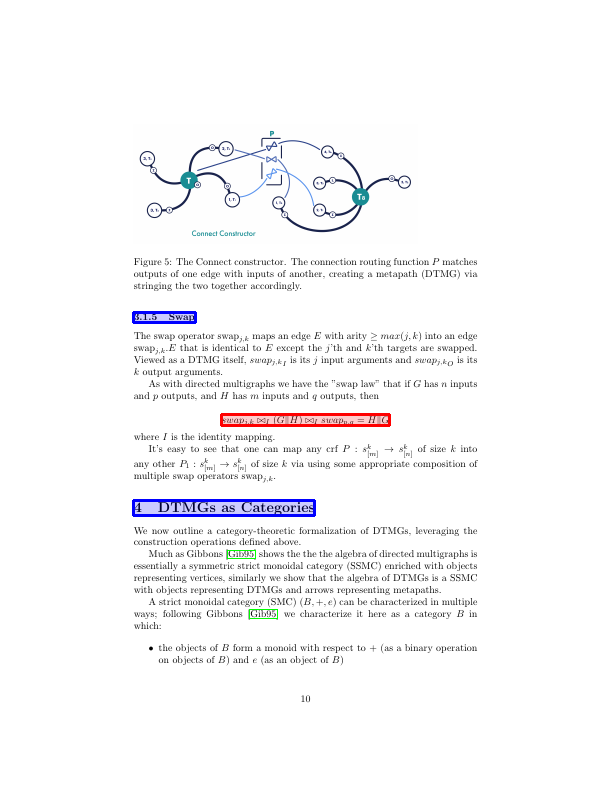

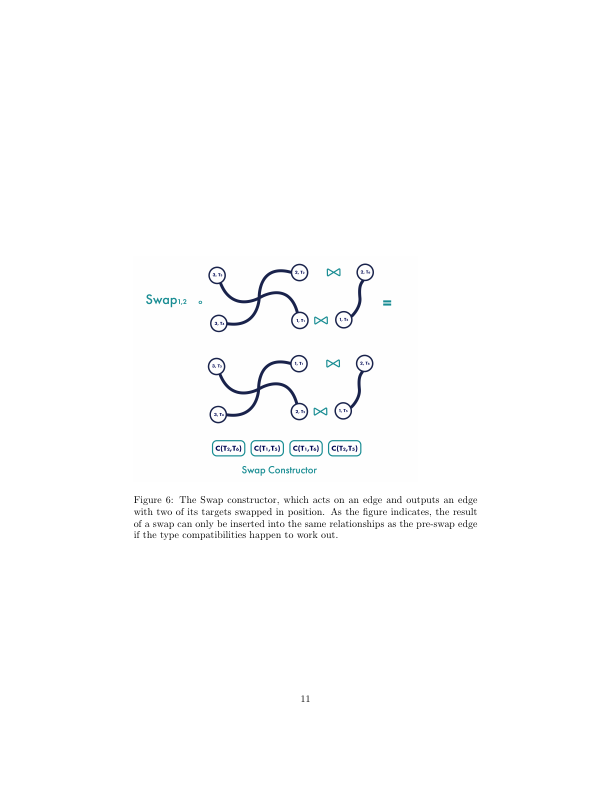

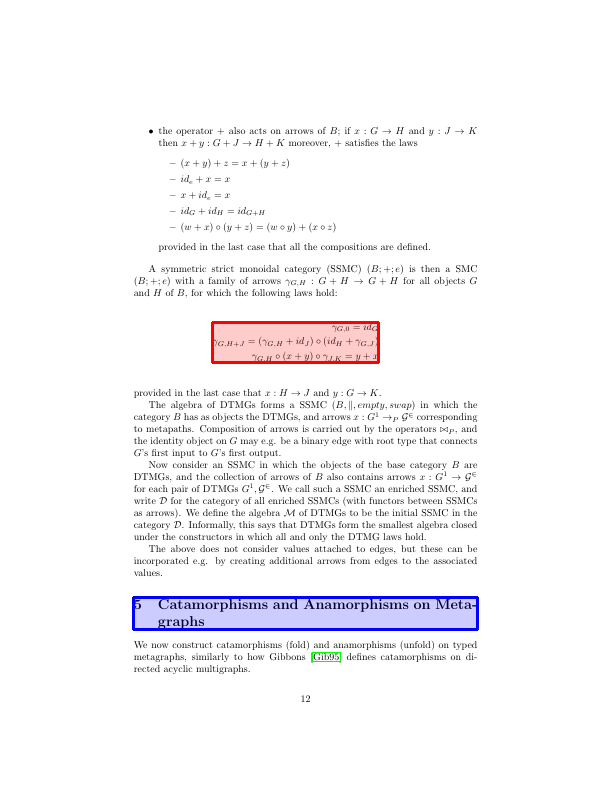

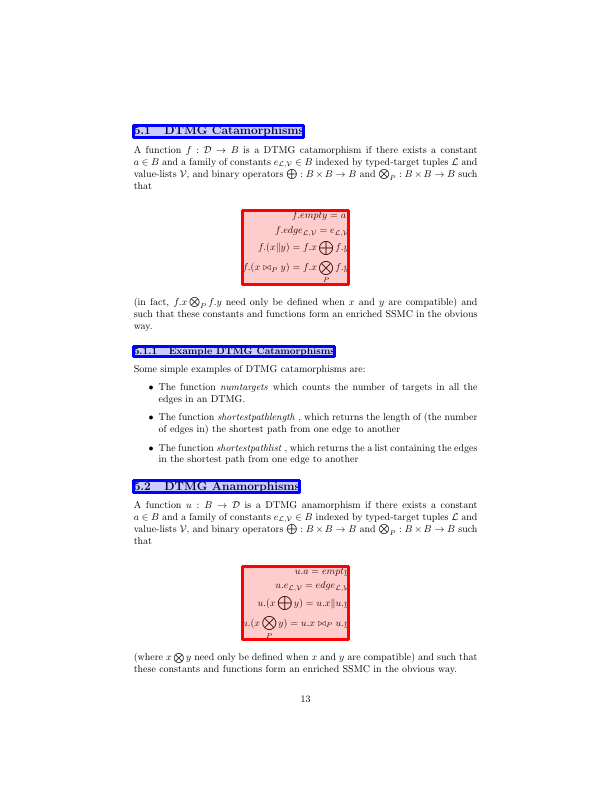

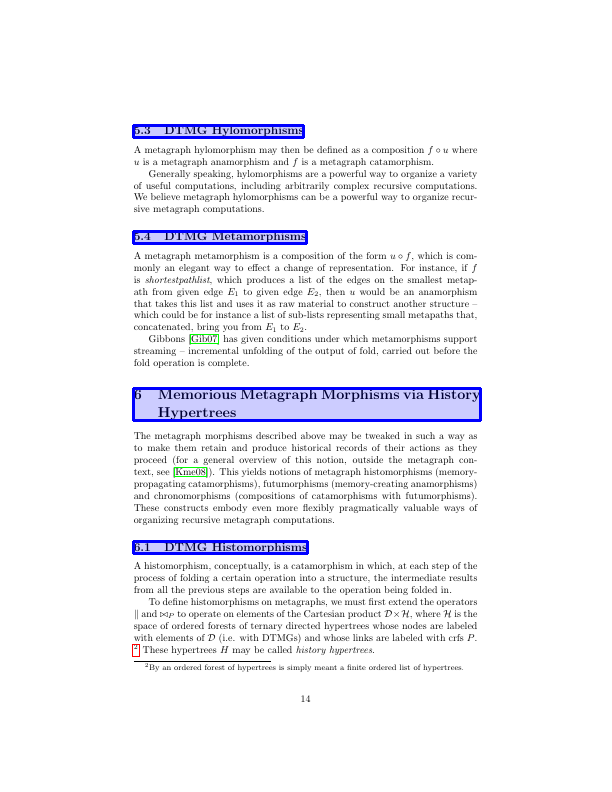

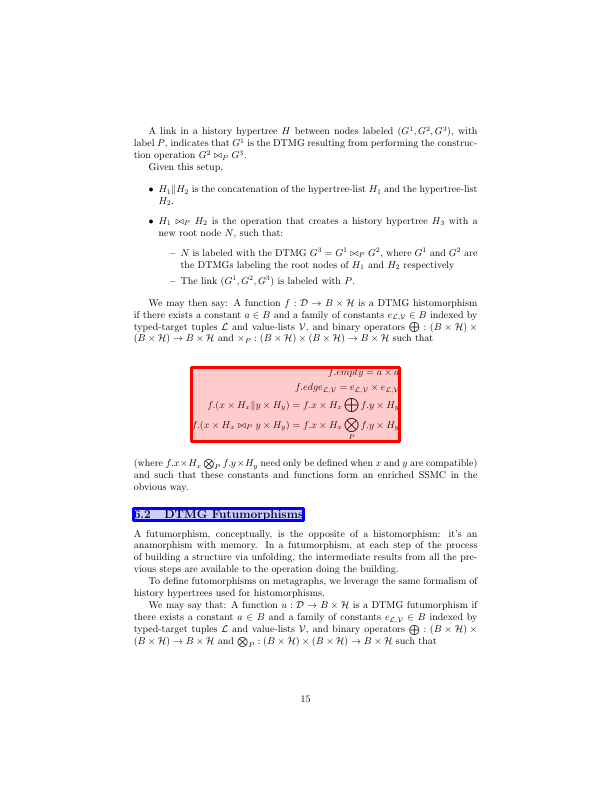

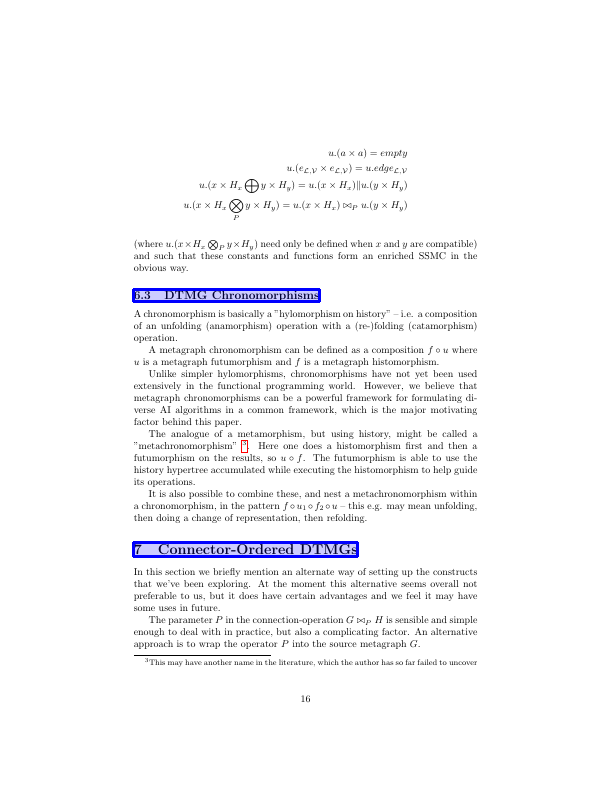

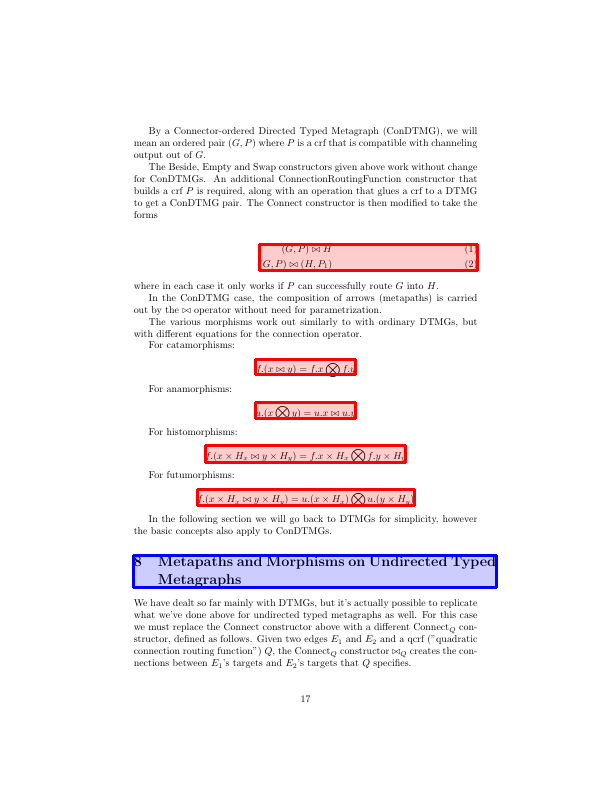

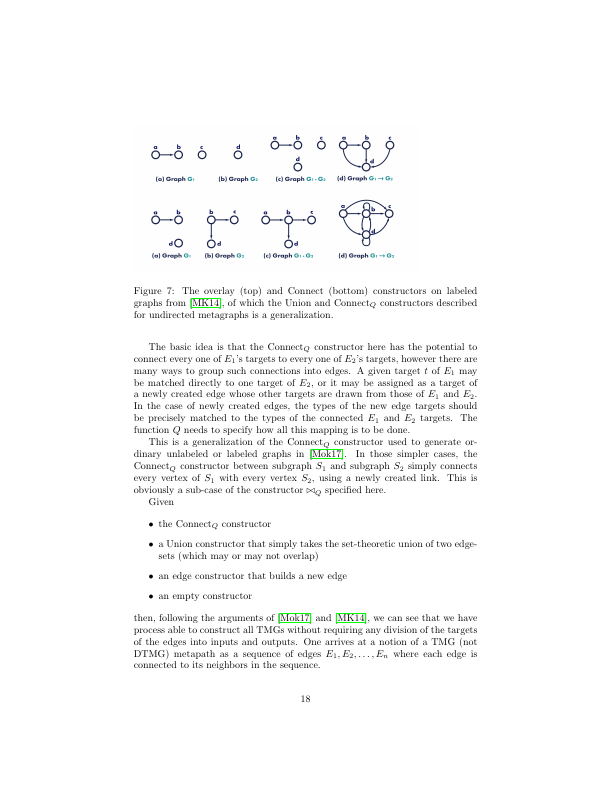

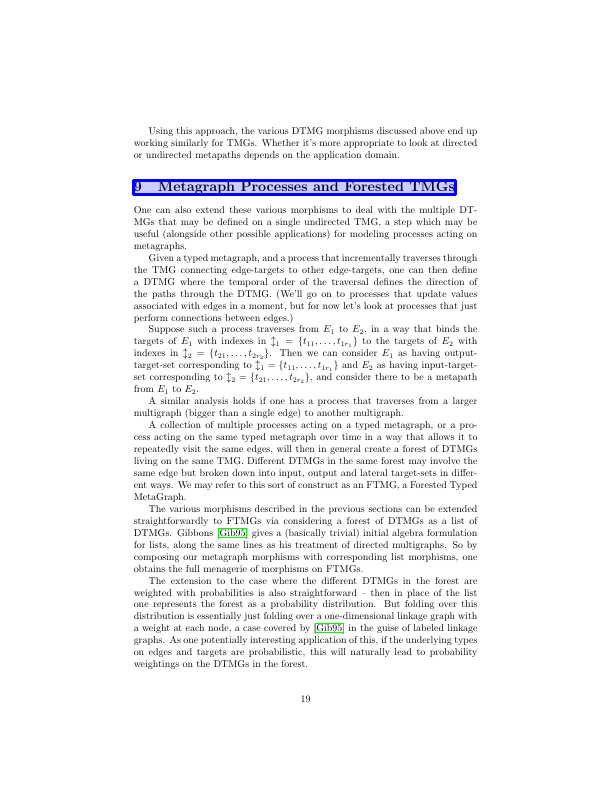

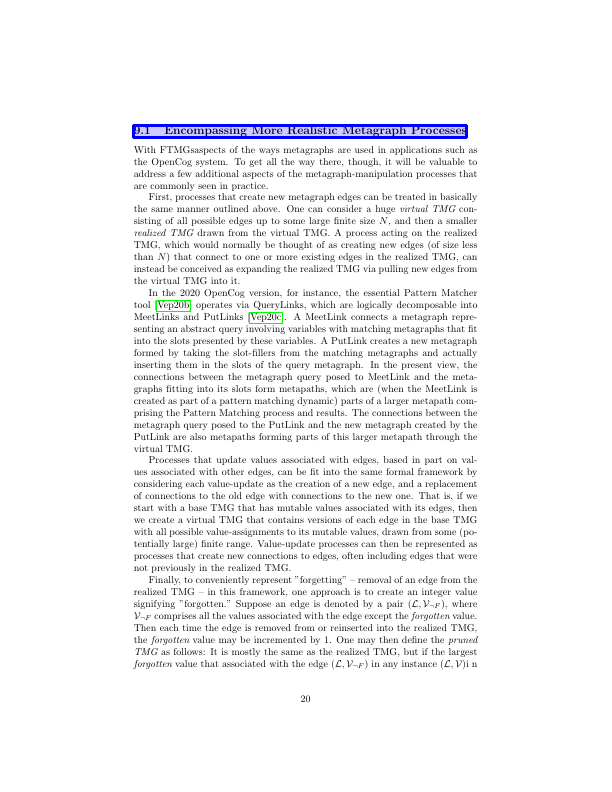

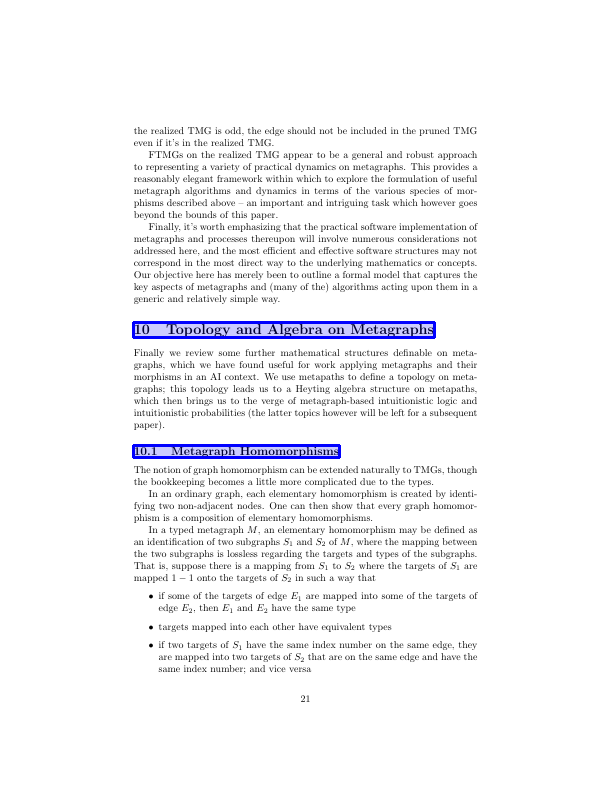

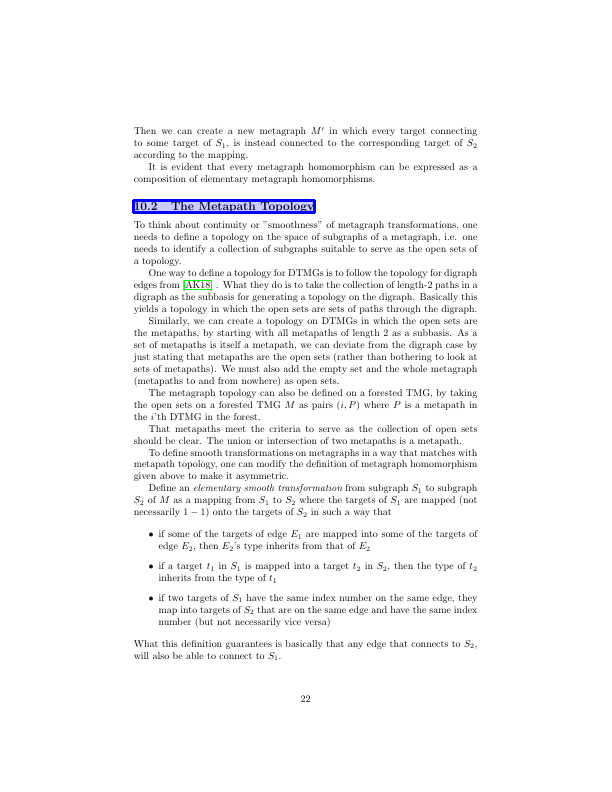

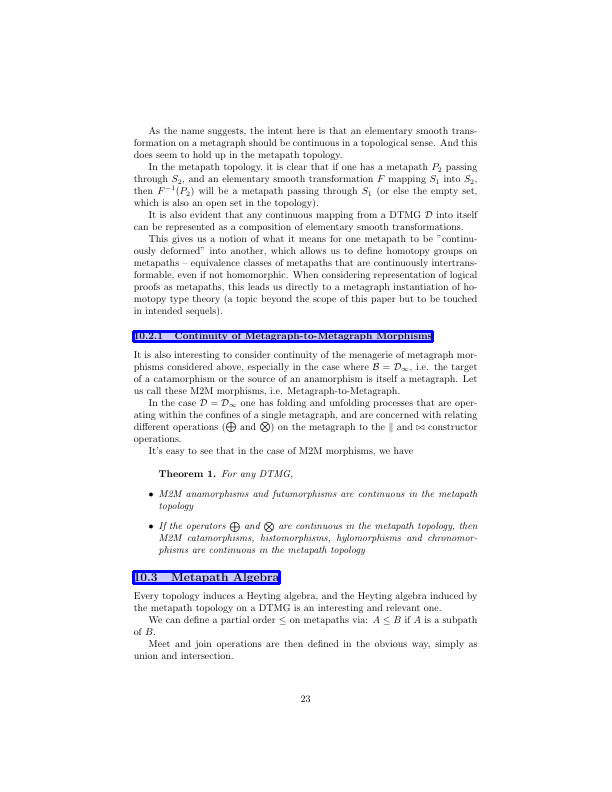

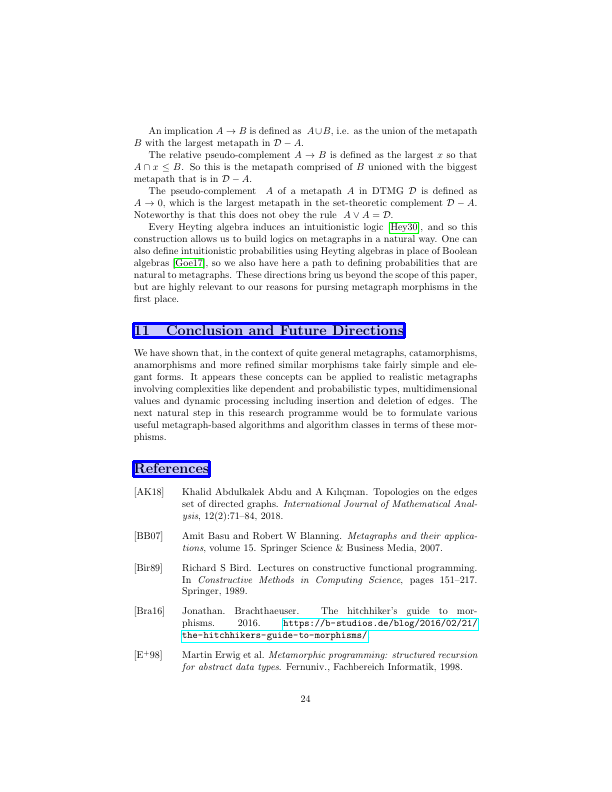

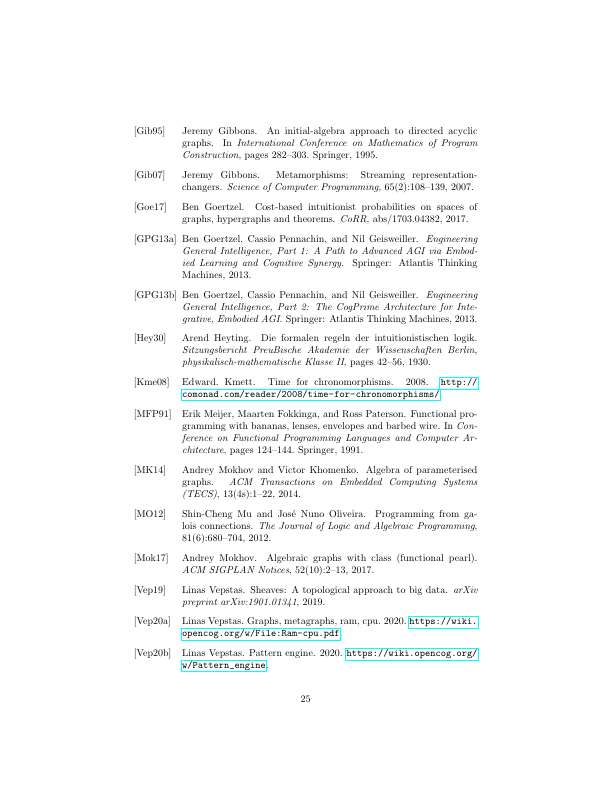

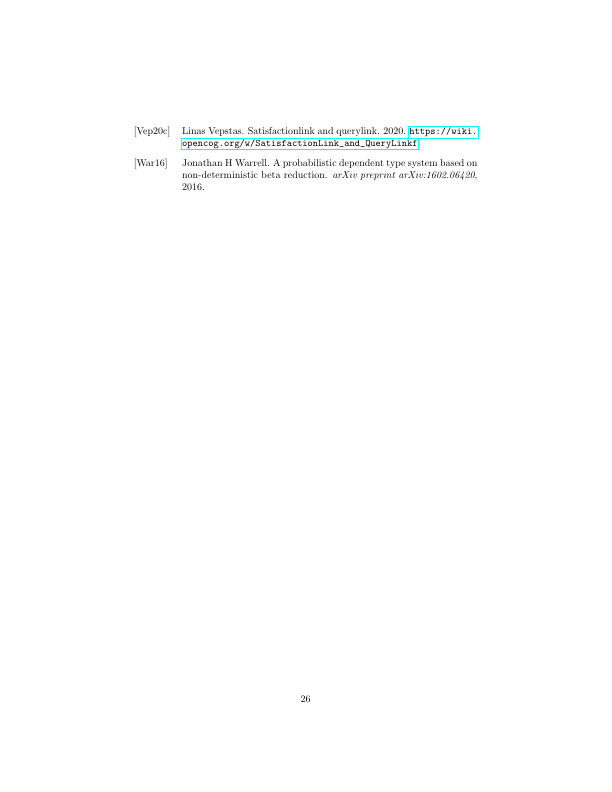

In [17]:
for page in doc.pages:
    section_image = plot_entities_on_page((page.images[0]), page.sections,  box_color="blue", box_alpha=0.2)
    figures_image = plot_entities_on_page(section_image, doc.equations.intersect_by_box(page),  box_color="red", box_alpha=0.2)
    display(figures_image)

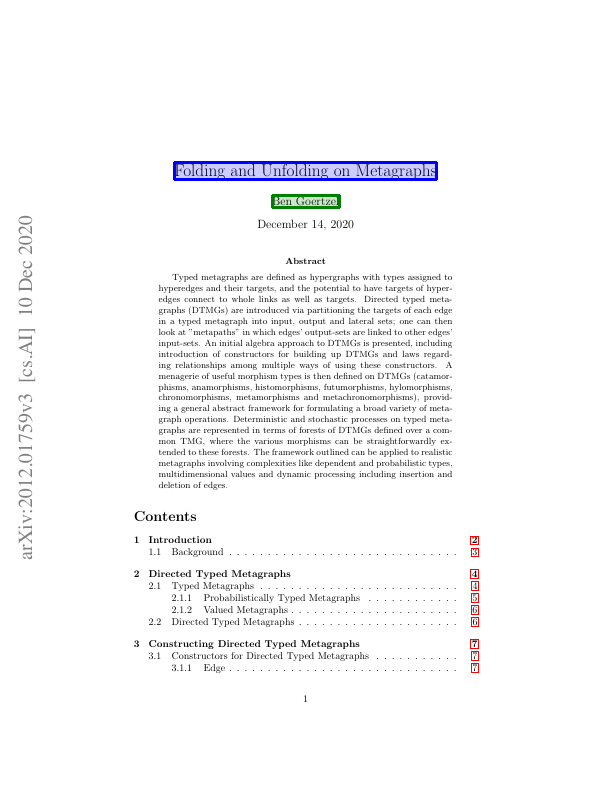

TITLE:
Folding and Unfolding on Metagraphs


AUTHORS:
Ben Goertzel


In [7]:
highlighted = plot_entities_on_page(doc.pages[0].images[0], doc.pages[0].titles, box_color="blue", box_alpha=0.2)
highlighted = plot_entities_on_page(highlighted, doc.pages[0].authors, box_color="green", box_alpha=0.2)
display(highlighted)

print('TITLE:')
print(doc.pages[0].titles[0].text)
print('\n\nAUTHORS:')
print(doc.pages[0].authors[0].text)

In [11]:
doc.pages[1].get_layer('equations')

AttributeError: 'function' object has no attribute 'intersect_by_span'